In [1]:
from mpl_toolkits.mplot3d import Axes3D
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib


# Display ROIs & M/EEG sensor positions

*Candidate for new tutorial on visualizing all elements of the data set*

To be sure of the accuracy of forward solution for M/EEG, it is important to verify the geometry of the sources and sensors, as well as the boundaries. Here, we plot these elements of the forward solution for TVB's default dataset.

First, we load the data

In [2]:
sens_meg = sensors.SensorsMEG.from_file()
conn = connectivity.Connectivity.from_file()
skin = surfaces.SkinAir.from_file()
skin.configure()
sens_eeg = sensors.SensorsEEG.from_file()
sens_eeg.configure()

WARNING  File 'hemispheres' not found in ZIP.


--- Logging error ---
Traceback (most recent call last):
  File "D:\Lurenz\tesimag\TVB_Distribution\tvb_data\Lib\logging\handlers.py", line 70, in emit
    self.doRollover()
  File "D:\Lurenz\tesimag\TVB_Distribution\tvb_data\Lib\logging\handlers.py", line 394, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "D:\Lurenz\tesimag\TVB_Distribution\tvb_data\Lib\logging\handlers.py", line 111, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\989937\\TVB\\logs\\library.log' -> 'C:\\Users\\989937\\TVB\\logs\\library.log.2022-04-08'
Call stack:
  File "D:\Lurenz\tesimag\TVB_Distribution\tvb_data\Lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\Lurenz\tesimag\TVB_Distribution\tvb_data\Lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "D:\Lurenz\tesimag\TVB_Distribution\tvb_data\Lib\site-packages\ipykernel_launcher.p

then, plot the different elements

<IPython.core.display.Javascript object>


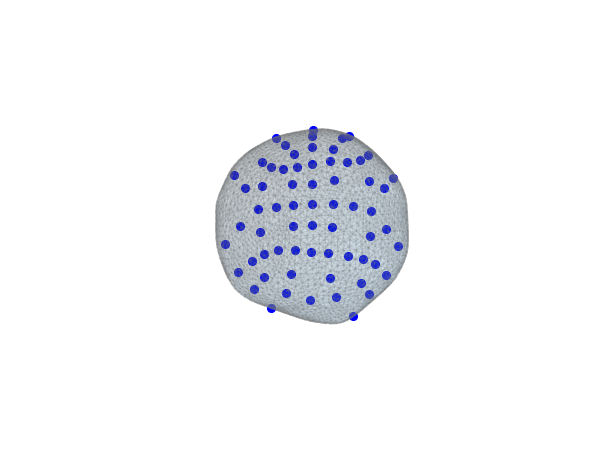

"\n# MEG sensors as red +'s\nx, y, z = sens_meg.locations.T\nax.plot(x, y, z, 'r+')"

In [23]:
figure()
ax = subplot(111, projection='3d')
'''
# ROI centers as black circles
x, y, z = conn.centres.T
ax.plot(x, y, z, 'ko')
'''
# EEG sensors as blue x's
x, y, z = sens_eeg.sensors_to_surface(skin).T
ax.plot(x, y, z, 'bo')
ax.set_axis_off()

# Plot boundary surface
x, y, z = skin.vertices.T
ax.plot_trisurf(x, y, z, triangles=skin.triangles, alpha=0.1, edgecolor='gray')
ax.set_axis_off()
'''
# MEG sensors as red +'s
x, y, z = sens_meg.locations.T
ax.plot(x, y, z, 'r+')'''

In [16]:
help(plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

_More visualizations to come:_

* volume data -> MRI acquisition -> Registration -> Coordinates transform to MNI space 
 |
  \-- voxel-based gray matter parcellation (obtain parcellation mask) -> AAL/anatomical template
 
* surfaces data (cortical, skull, skin surfaces extraction) -> FSL/BET 

* connectivity data (white matter weights, tract-lengths)   -> Diffusion Toolkit + TrackVis

* region mapping between parcellation and number of vertices in the cortical surface.

+ lead-field matrices (ie, projection matrices) mapping nodes onto EEG/MEG space